# Comparison of two groups

- Analysis of paired data
- Analysis of unpaired data

Author:  Thomas Haslwanter, Date:    March-2015

In [1]:
%pylab inline
#from numpy import genfromtxt, mean, std
import scipy.stats as stats
#import matplotlib.pyplot as plt
import sys
if sys.version_info.major == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen

Populating the interactive namespace from numpy and matplotlib


## Paired data

*Compare mean daily food intake in women over 10 pre-menstrual and 10 post-menstrual days (in kJ).*

In [3]:
# Get the data:  daily intake of energy in kJ for 11 women
inFile = 'altman_93.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro/master/Data/data_altman/'
url = url_base + inFile
data = genfromtxt(urlopen(url), delimiter=',')

mean(data, axis=0)
std(data, axis=0, ddof=1)

pre = data[:,0]
post = data[:,1]

### Paired T-test

In [4]:
# paired t-test: doing two measurments on the same experimental unit
# e.g., before and after a treatment
t_statistic, p_value = stats.ttest_1samp(post - pre, 0)

# p < 0.05 => alternative hypothesis:
# the difference in mean is not equal to 0
print("Paired t-test: {0:.7f}".format(p_value))

Paired t-test: 0.0000003


### Wilcoxon Test

In [5]:
# alternative to paired t-test when the data are on an ordinary scale
# or when they are not normally distributed
z_statistic, p_value = stats.wilcoxon(post - pre)
print("Paired Wilcoxon-test: {0:.4f}".format(p_value))

Paired Wilcoxon-test: 0.0033


## Unpaired Data

*Next some unpaired comparison: Compare the 24 hour total energy expenditure (MJ/day),
in groups of lean and obese women.*

In [6]:
# Get the data: energy expenditure in mJ and stature (0=obese, 1=lean)
inFile = 'altman_94.txt'
url = url_base + inFile
energ = genfromtxt(urlopen(url), delimiter=',')

# Group them
group1 = energ[:, 1] == 0
group1 = energ[group1][:, 0]
group2 = energ[:, 1] == 1
group2 = energ[group2][:, 0]

mean(group1)
mean(group2)

# two-sample t-test
# null hypothesis: the two groups have the same mean
# this test assumes the two groups have the same variance...
# (can be checked with tests for equal variance)
# independent groups: e.g., how boys and girls fare at an exam
# dependent groups: e.g., how the same class fare at 2 different exams
t_statistic, p_value = stats.ttest_ind(group1, group2)

# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print("Two-sample t-test: {0:.4f}".format(p_value))

Two-sample t-test: 0.0008


In [8]:
# For non-normally distributed data, perform the two-sample wilcoxon test
# a.k.a Mann Whitney U
u, p_value = stats.mannwhitneyu(group1, group2)
print("Two-sample Wilcoxon-test: {0:.4f}".format(p_value))

Two-sample Wilcoxon-test: 0.0011


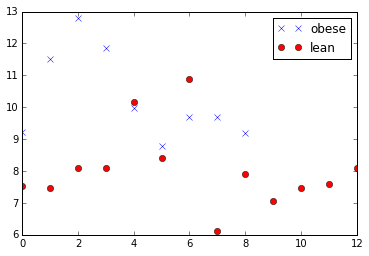

In [7]:
# Plot the data
plot(group1, 'bx', label='obese')
hold(True)
plot(group2, 'ro', label='lean')
legend(loc=0)